<a href="https://colab.research.google.com/github/samsomsabu/DEEP-LEARNING/blob/main/2348549_DL_LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SINGLE LAYER PERCEPTRON:

A single-layer perceptron has only one layer of weights and biases.

SLP is the simplest type of artificial neural networks and can only classify linearly separable cases with a binary target. Activation functions are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated or not, based on whether each neuron’s input is relevant for the model’s prediction.

Because SLP is a linear classifier and if the cases are not linearly separable the learning process will never reach a point where all the cases are classified properly. The most famous example of the inability of perceptron to solve problems with linearly non-separable cases is the XOR problem.

1
Single-layer perceptron advantages


One of the main advantages of using a single-layer perceptron is its simplicity and efficiency. It is easy to implement, train, and understand. It has a clear geometric interpretation as a hyperplane that separates two classes of data. It can also perform well on problems that are linearly separable, such as logical operations, linear regression, and binary classification.

2
Single-layer perceptron disadvantages


One of the main disadvantages of using a single-layer perceptron is its limited expressive power and generalization ability. It cannot learn to classify non-linearly separable patterns, such as XOR, circles, or spirals. It is also prone to overfitting and noise, as it tries to fit a straight line to the data. It does not have any hidden layers or activation functions that can introduce non-linearity and flexibility to the model.

In [2]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, weights, bias):
        self.weights = np.array(weights)
        self.bias = bias
        self.learning_rate = 0.1

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return 1 if summation >= 0 else 0

    def train(self, inputs, target):
        prediction = self.predict(inputs)
        error = target - prediction
        self.weights += self.learning_rate * error * inputs
        self.bias += self.learning_rate * error
        return error

def boolean_function_test(perceptron, boolean_function):
    inputs = boolean_function["inputs"]
    targets = boolean_function["targets"]

    print(f"\nTraining for {boolean_function['name']} function:")
    print("Initial Weights:", perceptron.weights)

    for epoch in range(1000):  # Adjust the number of epochs as needed
        total_errors = 0
        for i in range(len(inputs)):
            input_values = np.array(inputs[i])
            target_value = targets[i]
            error = perceptron.train(input_values, target_value)
            total_errors += abs(error)

        print(f"Epoch {epoch + 1}, Total Errors: {total_errors}")

        if total_errors == 0:
            print(f"\nConverged after {epoch + 1} epochs.")
            break

    print("Final Weights:", perceptron.weights)
    print("Final Bias:", perceptron.bias)

# Define boolean functions
and_function = {
    "name": "AND",
    "inputs": [[0, 0], [0, 1], [1, 0], [1, 1]],
    "targets": [0, 0, 0, 1],
    "initial_weights": [0.5, 0.5],  # Manually input initial weights
    "initial_bias": -0.5  # Manually input initial bias
}

or_function = {
    "name": "OR",
    "inputs": [[0, 0], [0, 1], [1, 0], [1, 1]],
    "targets": [0, 1, 1, 1],
    "initial_weights": [0.5, 0.5],  # Manually input initial weights
    "initial_bias": -0.5  # Manually input initial bias
}

nand_function = {
    "name": "NAND",
    "inputs": [[0, 0], [0, 1], [1, 0], [1, 1]],
    "targets": [1, 1, 1, 0],
    "initial_weights": [-0.5, -0.5],  # Manually input initial weights
    "initial_bias": 0.5  # Manually input initial bias
}

# Initialize perceptron with manual weights
perceptron_and = Perceptron(input_size=2, weights=and_function["initial_weights"], bias=and_function["initial_bias"])
perceptron_or = Perceptron(input_size=2, weights=or_function["initial_weights"], bias=or_function["initial_bias"])
perceptron_nand = Perceptron(input_size=2, weights=nand_function["initial_weights"], bias=nand_function["initial_bias"])

# Test each boolean function
boolean_function_test(perceptron_and, and_function)
boolean_function_test(perceptron_or, or_function)
boolean_function_test(perceptron_nand, nand_function)



Training for AND function:
Initial Weights: [0.5 0.5]
Epoch 1, Total Errors: 1
Epoch 2, Total Errors: 0

Converged after 2 epochs.
Final Weights: [0.5 0.4]
Final Bias: -0.6

Training for OR function:
Initial Weights: [0.5 0.5]
Epoch 1, Total Errors: 0

Converged after 1 epochs.
Final Weights: [0.5 0.5]
Final Bias: -0.5

Training for NAND function:
Initial Weights: [-0.5 -0.5]
Epoch 1, Total Errors: 0

Converged after 1 epochs.
Final Weights: [-0.5 -0.5]
Final Bias: 0.5


The XOR, or "exclusive OR", problem is a classic problem in the field of artificial intelligence and machine learning. It is a problem that cannot be solved by a single layer perceptron, and therefore requires a multi-layer perceptron or a deep learning model.

The XOR function
The XOR function is a binary function that takes two binary inputs and returns a binary output. The output is true if the number of true inputs is odd, and false otherwise. In other words, it returns true if exactly one of the inputs is true, and false otherwise.

The XOR problem
The XOR function is not linearly separable, which means we cannot draw a single straight line to separate the inputs that yield different outputs.

Overcoming the XOR problem
The XOR problem can be overcome by using a multi-layer perceptron (MLP), also known as a neural network. An MLP consists of multiple layers of perceptrons, allowing it to model more complex, non-linear functions.

A multi-layer neural network contains more than one layer of artificial neurons or nodes. They differ widely in design. It is important to note that while single-layer neural networks were useful early in the evolution of AI, the vast majority of networks used today have a multi-layer model.

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
# XOR inputs and outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[0], [1], [1], [0]])
# Create a sequential model
model = Sequential()
# Add layers
model.add(Dense(2, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
model.fit(inputs, outputs, epochs=5000, verbose=0)
# Evaluate the model
print(model.evaluate(inputs, outputs))

1/1 [==============================] - 0s 158ms/step - loss: 0.3480 - accuracy: 0.7500
[0.3480197787284851, 0.75]


https://www.educative.io/answers/xor-problem-in-neural-network

In [9]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR function
inputs_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_xor = np.array([[0], [1], [1], [0]])

# Define architecture (input layer, hidden layer, output layer)
input_layer_neurons = inputs_xor.shape[1]
hidden_layer_neurons = 3
output_layer_neurons = 1

# Initialize weights and biases
hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
hidden_biases = np.zeros((1, hidden_layer_neurons))

output_weights = np.random.uniform(size=(hidden_layer_neurons, output_layer_neurons))
output_biases = np.zeros((1, output_layer_neurons))

# Training the neural network using backpropagation
epochs = 1000
learning_rate = 0.1

for epoch in range(epochs):
    # Forward pass
    hidden_activation = sigmoid(np.dot(inputs_xor, hidden_weights) + hidden_biases)
    # The input data is passed through the network layer by layer,
    # with each layer applying its activation function to produce an output.

    output_activation = sigmoid(np.dot(hidden_activation, output_weights) + output_biases)
    # The final output is compared with the actual target output to compute the error.

    # Compute errors
    output_error = target_xor - output_activation
    # The error at the output layer is computed by finding the difference
    # between the predicted output and the actual target.

    hidden_error = output_error.dot(output_weights.T)
    # This error is often referred to as the "output error" or "loss."

    # Backpropagation
    output_delta = output_error * sigmoid_derivative(output_activation)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_activation)
    #The gradients of the errors with respect to the activations are computed using the derivative of the sigmoid activation function (sigmoid_derivative).

    # Update weights and biases for the output layer
    output_weights += hidden_activation.T.dot(output_delta) * learning_rate
    output_biases += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

    # Update weights and biases for the hidden layer
    hidden_weights += inputs_xor.T.dot(hidden_delta) * learning_rate
    hidden_biases += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate
    #The weights and biases are updated for both the output and hidden layers using the computed gradients and the learning rate.

# Print final output after training
print("XOR function:")
print("Final Output after Training:")
print(output_activation)


XOR function:
Final Output after Training:
[[0.04227583]
 [0.96425547]
 [0.96462715]
 [0.03586876]]


this is the answer that chatgpt gave

In [28]:
import tensorflow as tf
import numpy as np

# Define XOR data
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
targets = np.array([[0], [1], [1], [0]], dtype=np.float32)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=2, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(inputs, targets, epochs=10000, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(inputs, targets)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Predict XOR outputs
predictions = model.predict(inputs)
rounded_predictions = np.round(predictions)
print("\nPredictions:")
print(rounded_predictions)


1/1 [==============================] - 0s 132ms/step - loss: 0.0020 - accuracy: 1.0000



Model Accuracy: 100.00%
1/1 [==============================] - 0s 54ms/step

Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


tensorflow way but it is overfittting .this is a usal problem  with deep neural networks.we can solve this using regularization or dropout method.

In [29]:
import tensorflow as tf
import numpy as np

# Define XOR data
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
targets = np.array([[0], [1], [1], [0]], dtype=np.float32)

# Define the model with regularization and dropout
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=4, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping and validation split
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

history = model.fit(inputs, targets, epochs=10000, verbose=0, callbacks=[early_stopping], validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(inputs, targets)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Predict XOR outputs
predictions = model.predict(inputs)
rounded_predictions = np.round(predictions)
print("\nPredictions:")
print(rounded_predictions)


1/1 [==============================] - 0s 44ms/step - loss: 0.7128 - accuracy: 0.5000

Model Accuracy: 50.00%
1/1 [==============================] - 0s 96ms/step

Predictions:
[[1.]
 [1.]
 [1.]
 [1.]]


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Defining the XOR input and output data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Defining the architecture of the neural network (Multi-layer perceptron)
model = Sequential([
    Dense(2, input_dim=2, activation='relu'),  # Hidden layer with 2 neurons and R activation
    Dense(1, activation='sigmoid')             # Output layer with 1 neuron and Sigmoid activation
])

# Compiling the model
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
# Binary cross-entropy is a common loss function used to measure the difference between the true labels and the predicted probabilities. It is also known as losg loss.
#L(y, y') = -[y * log(y') + (1 - y) * log(1 - y')]; y is the true label, y' is the predicted label

# Training the model
model.fit(X, y, epochs=1000, verbose=0)
#Setting verbose to 0 means silent mode, where no output will be displayed during the training process.

# Evaluating the model
loss, accuracy = model.evaluate(X, y)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Prediction using the trained model
predictions = model.predict(X)
print("Predictions:")
print(predictions)

1/1 [==============================] - 0s 130ms/step - loss: 0.6931 - accuracy: 0.5000
Loss: 0.6931474208831787, Accuracy: 0.5
1/1 [==============================] - 0s 59ms/step
Predictions:
[[0.49979   ]
 [0.49962884]
 [0.49964005]
 [0.49947885]]


Global Minima found at x = -1.1105093598463913, f(x) = -3.2463942726873016
Number of iterations: 14


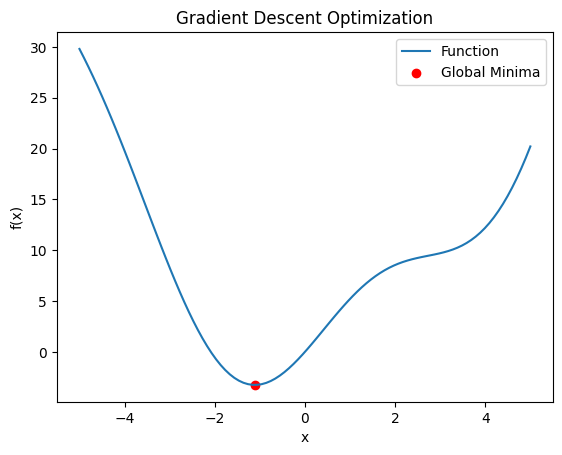

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the equation to minimize
def equation(x):
    return x**2 + 5*np.sin(x)

# Define the derivative of the equation (gradient)
def gradient(x):
    return 2*x + 5*np.cos(x)

# Gradient Descent Algorithm
def gradient_descent(initial_guess, learning_rate, tolerance):
    x = initial_guess
    iterations = 0

    while True:
        x_new = x - learning_rate * gradient(x)
        if abs(x_new - x) < tolerance:
            break
        x = x_new
        iterations += 1

    return x, iterations

# Visualization
def plot_results(x_vals, y_vals, minima_x, minima_y):
    plt.plot(x_vals, y_vals, label='Function')
    plt.scatter(minima_x, minima_y, color='red', label='Global Minima')
    plt.title('Gradient Descent Optimization')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

# Parameters
initial_guess = 0.0
learning_rate = 0.1
tolerance = 1e-6

# Run gradient descent
minima_x, iterations = gradient_descent(initial_guess, learning_rate, tolerance)
minima_y = equation(minima_x)

# Generate data for visualization
x_vals = np.linspace(-5, 5, 100)
y_vals = equation(x_vals)

# Print results
print(f"Global Minima found at x = {minima_x}, f(x) = {minima_y}")
print(f"Number of iterations: {iterations}")

# Plot the results
plot_results(x_vals, y_vals, minima_x, minima_y)


gradient descent
